** Health Data EDA and Analysis**
---
> **Context**

- EDA
- Data Analysis

In [ ]:
### Setting up the environment

# Korean Font Download
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

In [ ]:
# Korean Font
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## **Data Overview**
---


- Source : [Korea Public Data Portal](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `National Health Insurance Service_Health Screening Data`


| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Pandas option setting
pd.set_option('display.max_columns',100)

### Read CSV File


In [ ]:
health_df = pd.read_csv('./health_info.csv', encoding="cp949")
health_df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,1.0,1.0,136.0,81.0,134.0,240.0,108.0,73.0,145.0,12.4,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,NaN,NaN
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,2.0,1.0,119.0,83.0,181.0,205.0,191.0,47.0,120.0,15.7,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,NaN,NaN
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,1.0,1.0,109.0,60.0,91.0,178.0,61.0,54.0,112.0,13.7,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


## **EDA**  
---

* Basic Information of the Data  

  (1) Data shape

  (2) Data type

  (3) Null Value

  (4) Outlier Value

### Understanding the Data

In [ ]:
# Data Shape
health_df.shape

(1000000, 30)

In [ ]:
# Data type
health_df.dtypes

,0
기준년도,int64
가입자일련번호,int64
시도코드,int64
성별,int64
연령대코드(5세단위),int64
신장(5cm단위),int64
체중(5kg단위),int64
허리둘레,float64
시력(좌),float64
시력(우),float64


In [ ]:
health_df.head(30)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


In [ ]:
# Null Value
health_df.isna().sum()
round(health_df.isna().mean()*100, 1)

,0
기준년도,0.0
가입자일련번호,0.0
시도코드,0.0
성별,0.0
연령대코드(5세단위),0.0
신장(5cm단위),0.0
체중(5kg단위),0.0
허리둘레,0.0
시력(좌),0.0
시력(우),0.0


- Why do some columns have around 65% missing values?
  - The columns with a lot of missing values were added to the data from 2009.

#### Data Pre-processing


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

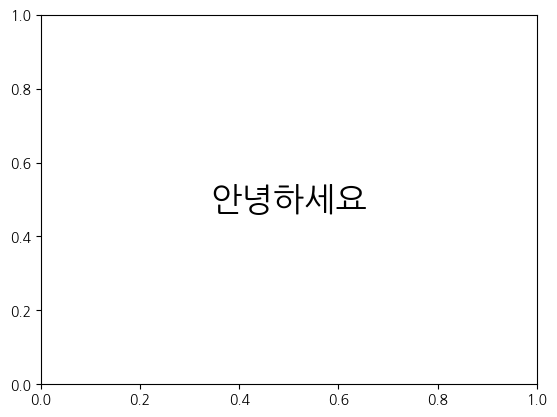

In [ ]:
### Korea Font Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get install -y fonts-nanum
!fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

plt.text(0.5, 0.5, '안녕하세요', ha='center', va='center', size=24)
plt.show()

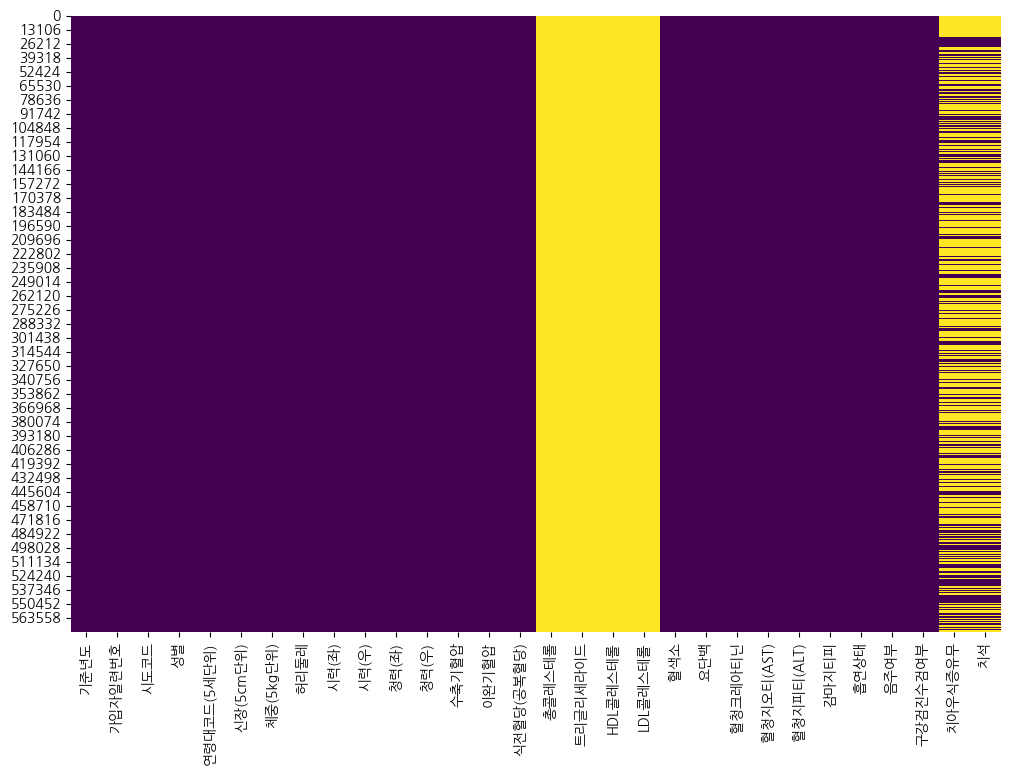

In [ ]:
# Missing Value Visualization
missing_data = health_df.isna().sum()

#missing_data.sort_values().plot(kind='barh')
plt.figure(figsize=(12, 8))
sns.heatmap(health_df.isna(), cmap='viridis', cbar=False)
plt.show()

In [ ]:
# Drop Null Values
health_df = health_df.dropna()

In [ ]:
health_df.isna().sum()

,0
기준년도,0
가입자일련번호,0
시도코드,0
성별,0
연령대코드(5세단위),0
신장(5cm단위),0
체중(5kg단위),0
허리둘레,0
시력(좌),0
시력(우),0


In [ ]:
health_df.head(30)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석


In [ ]:
# Check Duplicated Value
health_df.loc[health_df.duplicated(),:]

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석


#### Mapping Actual Values to Categorical Variables


In [ ]:
# Age Mapping
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [ ]:
# Age Group Update
health_df['연령대'] = health_df['연령대코드(5세단위)'].map(age_group_mapping)
#health_df['연령대'] = health_df['연령대코드(5세단위)'].apply(lambda x: age_group_mapping[x])

In [ ]:
# City Code mapping
health_df['시도코드'].unique()

array([], dtype=int64)

In [ ]:
health_df['시도코드'].value_counts()

,count
시도코드,


In [ ]:
city_code_mapping = {
    11: "서울특별시", 26: "부산광역시", 27: "대구광역시", 28: "인천광역시", 29: "광주광역시",
    30: "대전광역시", 31: "울산광역시", 36: "세종특별자치시", 41: "경기도", 42: "강원도", 43: "충청북도",
    44: "충청남도", 45: "전라북도", 46: "전라남도", 47: "경상북도", 48: "경상남도", 49: "제주특별자치도"
    }


In [ ]:
# City Code Update
health_df['시도'] = health_df['시도코드'].map(city_code_mapping)

In [ ]:
# Gender Mapping
gender = {
    1 : '남자', # Male
    2 : '여자'  # Female
}
health_df['성별'] = health_df['성별'].map(gender)

In [ ]:
# Smoking Status Mapping
smoking = {
    1 : '피우지 않는다',        # No smoking
    2 : '이전에 피웠으나 끊었다', # Quit smoking
    3 : '현재도 피우고 있다'     # Currently smoking
}
health_df['흡연상태'] = health_df['흡연상태'].map(smoking)

In [ ]:
# Drinking Status Mapping
drinking = {
    0 : '마시지 않는다', # Drinking
    1 : '마신다'       # No Drinking
}
health_df['음주여부'] = health_df['음주여부'].map(drinking)

In [ ]:
# Dental Checkup Status Mapping
teeth = {
    0 : '미수검', # X
    1 : '수검'   # O
}
health_df['구강검진수검여부'] = health_df['구강검진수검여부'].map(teeth)

#### Deleting Outlier Values


In [ ]:
new_df = health_df.copy()
new_df.shape

(106876, 30)

In [ ]:
# Remove outlier data from each column

cols = new_df.columns # filtering process is required for string data

def remove_out(dataframe, remove_col):
  new_df = health_df.copy()

  for col in remove_col:

    if pd.api.types.is_numeric_dtype(new_df[col]):

      Q1 = new_df[col].quantile(0.25)
      Q3 = new_df[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

    else:
      print(f"Column {col} is not numeric and will be skipped.")

  return new_df

new2_df = remove_out(new_df, cols)

In [ ]:
# Comparison of DataFrame size before and after outlier removal

print(health_df.shape)
print(new2_df.shape)

(106876, 30)
(53325, 30)


#### Numeric Data and Categorical Data


In [ ]:
new2_df.dtypes

,0
기준년도,int64
가입자일련번호,int64
시도코드,int64
성별,int64
연령대코드(5세단위),int64
신장(5cm단위),int64
체중(5kg단위),int64
허리둘레,float64
시력(좌),float64
시력(우),float64


In [ ]:
# Categorical Data
cat_cols = ['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '연령대코드(5세단위)', '시도코드']

In [ ]:
# Numeric Data
num_cols = [col for col in new2_df.columns if col not in cat_cols]

#### Descriptive Statistics


In [ ]:
# Numeric Data
new2_df[num_cols].describe()

,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.0,53325.0,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.0,53325.000000,53325.000000,53325.000000,53325.000000
mean,163.098172,63.383872,80.508656,0.932443,0.931572,1.0,1.0,120.643863,74.270942,96.112574,197.375340,104.542203,57.571139,118.998068,14.209842,1.0,0.850003,23.284444,20.865842,22.931008
std,9.505881,12.021326,8.933913,0.310379,0.309615,0.0,0.0,12.707359,8.840727,10.155085,35.974181,48.665467,12.946261,32.986135,1.365393,0.0,0.192761,5.808553,8.319417,10.639024
min,135.000000,30.000000,56.500000,0.100000,0.100000,1.0,1.0,86.000000,51.000000,68.000000,98.000000,10.000000,19.000000,25.000000,10.200000,1.0,0.300000,7.000000,1.000000,1.000000
25%,155.000000,55.000000,74.000000,0.700000,0.700000,1.0,1.0,111.000000,68.000000,89.000000,172.000000,68.000000,48.000000,96.000000,13.200000,1.0,0.700000,19.000000,15.000000,15.000000
50%,165.000000,60.000000,80.200000,1.000000,1.000000,1.0,1.0,120.000000,74.000000,95.000000,196.000000,94.000000,56.000000,118.000000,14.200000,1.0,0.800000,23.000000,19.000000,20.000000
75%,170.000000,70.000000,86.500000,1.200000,1.200000,1.0,1.0,130.000000,80.000000,102.000000,222.000000,131.000000,66.000000,141.000000,15.200000,1.0,1.000000,27.000000,26.000000,28.000000
max,190.000000,105.000000,108.500000,1.900000,1.900000,1.0,1.0,158.000000,99.000000,127.000000,301.000000,262.000000,94.000000,212.000000,18.500000,1.0,1.400000,42.000000,47.000000,57.000000


In [ ]:
# Categorical Data
new2_df[cat_cols].describe()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대코드(5세단위),시도코드
count,53325.0,5.332500e+04,53325.000000,53325.000000,53325.000000,53325.000000,53325.000000,53325.0,53325.0,53325.000000,53325.000000,53325.000000
mean,2022.0,2.493977e+06,33.414421,1.463085,10.633943,1.495059,0.652977,1.0,0.0,0.527220,10.633943,33.414421
std,0.0,1.444515e+06,12.525231,0.498640,2.728592,0.750515,0.476028,0.0,0.0,0.563594,2.728592,12.525231
min,2022.0,2.360000e+02,11.000000,1.000000,5.000000,1.000000,0.000000,1.0,0.0,0.000000,5.000000,11.000000
25%,2022.0,1.242542e+06,27.000000,1.000000,9.000000,1.000000,0.000000,1.0,0.0,0.000000,9.000000,27.000000
50%,2022.0,2.488291e+06,41.000000,1.000000,11.000000,1.000000,1.000000,1.0,0.0,0.000000,11.000000,41.000000
75%,2022.0,3.746039e+06,43.000000,2.000000,13.000000,2.000000,1.000000,1.0,0.0,1.000000,13.000000,43.000000
max,2022.0,4.999993e+06,49.000000,2.000000,18.000000,3.000000,1.000000,1.0,0.0,2.000000,18.000000,49.000000


#### Data Distribution


array([[<Axes: title={'center': '신장(5cm단위)'}>,
        <Axes: title={'center': '체중(5kg단위)'}>,
        <Axes: title={'center': '허리둘레'}>,
        <Axes: title={'center': '시력(좌)'}>],
       [<Axes: title={'center': '시력(우)'}>,
        <Axes: title={'center': '청력(좌)'}>,
        <Axes: title={'center': '청력(우)'}>,
        <Axes: title={'center': '수축기혈압'}>],
       [<Axes: title={'center': '이완기혈압'}>,
        <Axes: title={'center': '식전혈당(공복혈당)'}>,
        <Axes: title={'center': '총콜레스테롤'}>,
        <Axes: title={'center': '트리글리세라이드'}>],
       [<Axes: title={'center': 'HDL콜레스테롤'}>,
        <Axes: title={'center': 'LDL콜레스테롤'}>,
        <Axes: title={'center': '혈색소'}>, <Axes: title={'center': '요단백'}>],
       [<Axes: title={'center': '혈청크레아티닌'}>,
        <Axes: title={'center': '혈청지오티(AST)'}>,
        <Axes: title={'center': '혈청지피티(ALT)'}>,
        <Axes: title={'center': '감마지티피'}>]], dtype=object)

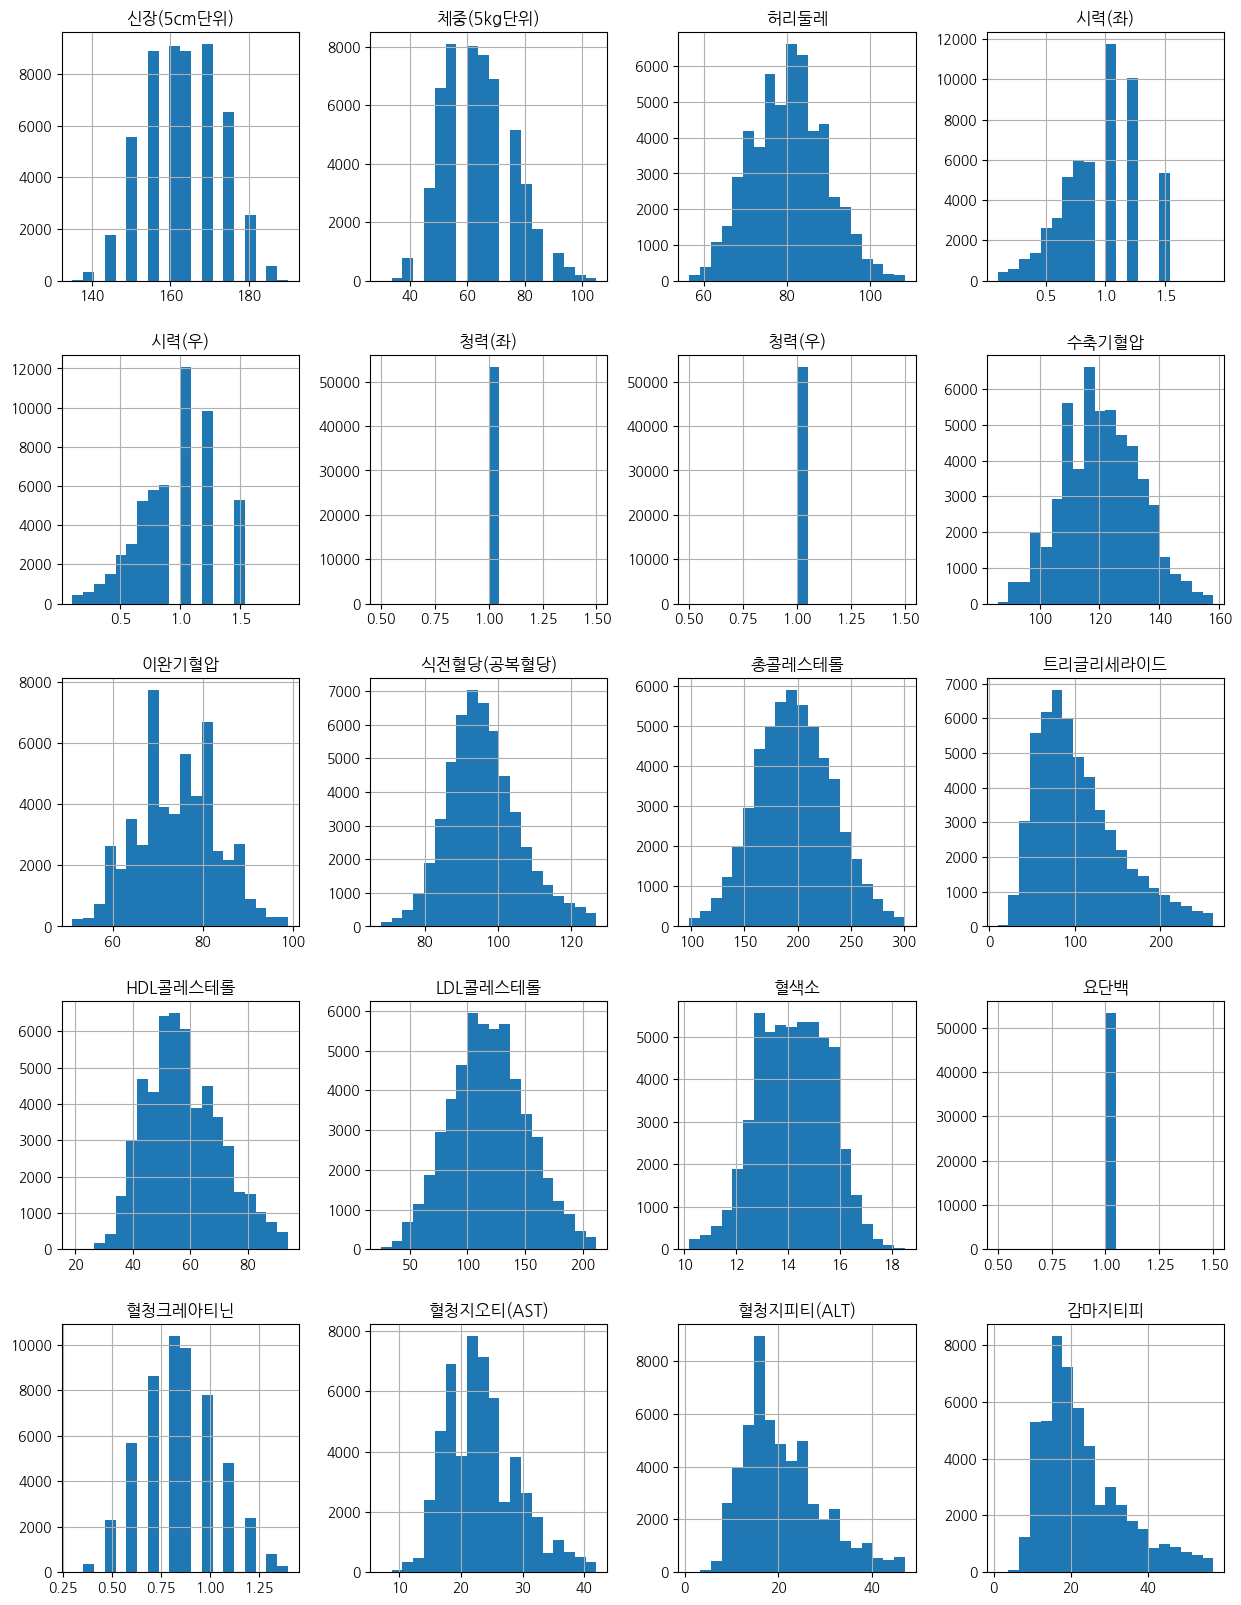

In [ ]:
new2_df[num_cols].hist(bins=20, figsize=(15,20))

### Relationship Between Attributes

#### Correlation Analysis


In [ ]:
set(num_cols) - set()

{'HDL콜레스테롤',
 'LDL콜레스테롤',
 '감마지티피',
 '수축기혈압',
 '시력(우)',
 '시력(좌)',
 '식전혈당(공복혈당)',
 '신장(5cm단위)',
 '요단백',
 '이완기혈압',
 '청력(우)',
 '청력(좌)',
 '체중(5kg단위)',
 '총콜레스테롤',
 '트리글리세라이드',
 '허리둘레',
 '혈색소',
 '혈청지오티(AST)',
 '혈청지피티(ALT)',
 '혈청크레아티닌'}

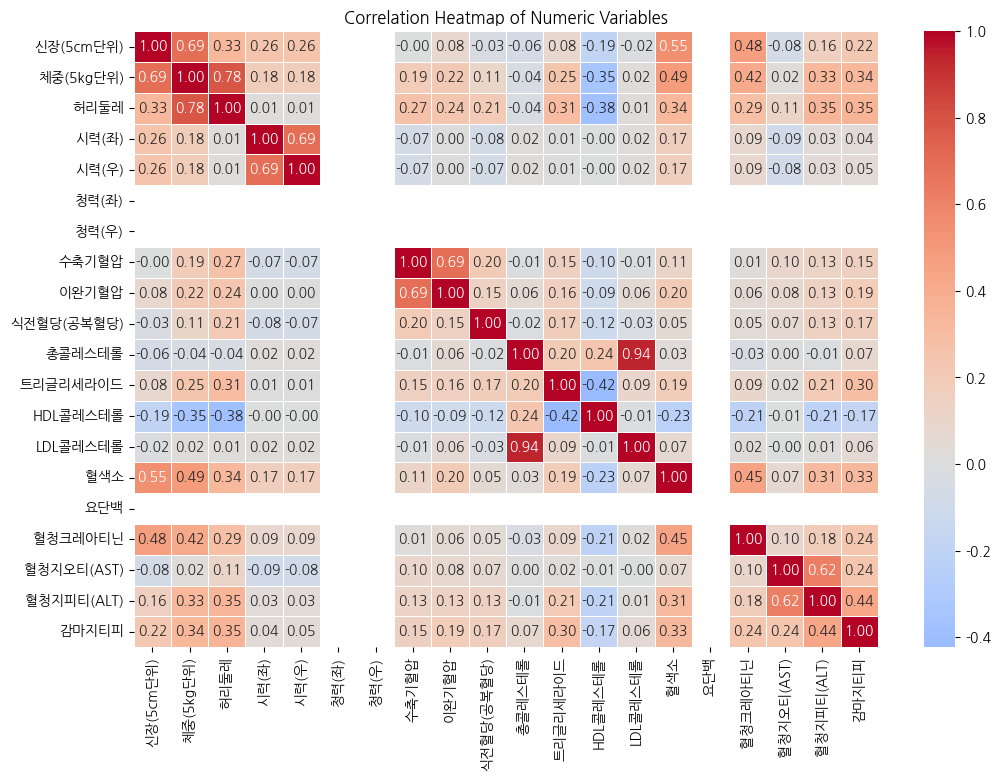

In [ ]:
# Correlation
correlation_matrix = new2_df[num_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

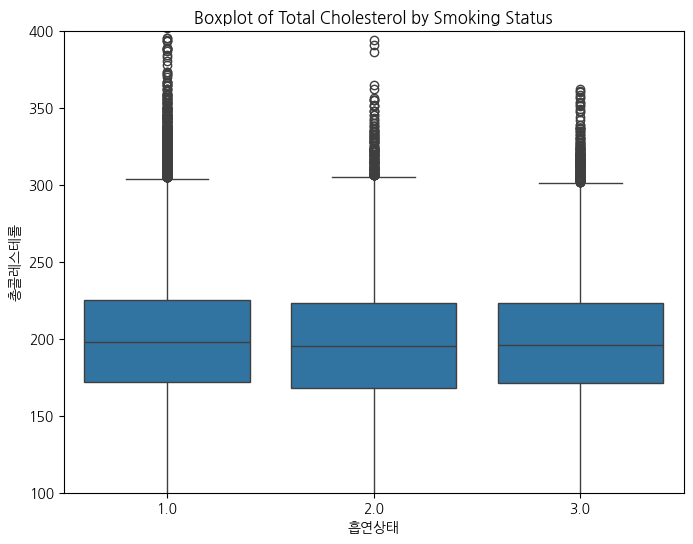

In [ ]:
# Boxplot
'''
Smoking Status
    1.0: No smoking
    2.0: Quit smoking
    3.0:Currently smoking
'''

plt.figure(figsize=(8, 6))
sns.boxplot(x='흡연상태', y='총콜레스테롤', data=health_df)
plt.ylim(100, 400)
plt.title('Boxplot of Total Cholesterol by Smoking Status')
plt.show()

## **Data Analysis**  
---

### Hypothesis
(Reference: Lee, K.; Kim, S.; Jo, J.K. The Relationships between Abnormal Serum Lipid Levels, Depression, and Suicidal Ideation According to Sex. J. Clin. Med. 2022, 11, 2119. https://doi.org/10.3390/jcm11082119)

1. People who feel depressed are more likely to smoke, so smokers are expected to have lower cholesterol levels.

2. Smoking and LDL cholesterol will show a positive correlation, while smoking and HDL cholesterol will show a negative correlation.

### ANOVA

In [ ]:
'''
Smoking Status
    1.0: No smoking
    2.0: Quit smoking
    3.0:Currently smoking
'''

import scipy.stats as stats

# Dividing Groups
smoking_group = health_df[health_df['흡연상태'] == 1.0]['총콜레스테롤']
quitting_group = health_df[health_df['흡연상태'] == 2.0]['총콜레스테롤']
non_smoking_group = health_df[health_df['흡연상태'] == 3.0]['총콜레스테롤']

# ANOVA
f_stat, p_value_anova = stats.f_oneway(smoking_group, quitting_group, non_smoking_group)

print(f"ANOVA result: F-statistic = {f_stat}, p-value = {p_value_anova}")


ANOVA result: F-statistic = 80.17957083790778, p-value = 1.6015959682691537e-35


- ANOVA result: F-statistic = 80.18,
- p-value = 1.60e-35
- Result: There is a significant difference in total cholesterol based on smoking status.

### Regression

In [ ]:
'''
Smoking Status
    1.0: No smoking
    2.0: Quit smoking
    3.0:Currently smoking
'''

import statsmodels.api as sm

smoke_chol = health_df[['흡연상태', '총콜레스테롤']]

smoke_chol['흡연상태'] = smoke_chol['흡연상태'].astype('category')

# Create dummy variables
dummies = pd.get_dummies(smoke_chol['흡연상태'])

# Drop the second dummy variable
# To compare 'no smoking' and 'smoking'
columns_to_drop = dummies.columns[1]
dummies = dummies.drop(columns=[columns_to_drop])

X = pd.concat([dummies], axis=1).astype('float')
X = sm.add_constant(X)
y = smoke_chol['총콜레스테롤']

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 총콜레스테롤   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     80.18
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.60e-35
Time:                        01:21:23   Log-Likelihood:            -5.4712e+05
No. Observations:              106876   AIC:                         1.094e+06
Df Residuals:                  106873   BIC:                         1.094e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        195.7861      0.276    708.157      0.0

- Coefficient of Smoking Status 1.0 (No smoking): 3.78
- Coefficient of Smoking Status 3.0 (Smoking): 1.44
- Result: Smokers (3.0) tend to have lower cholesterol level compared to the reference group than non-smokers (1.0). -> This finding aligns with the first hypothesis.

In [ ]:
np.asarray(health_df['총콜레스테롤'])

array([243., 216., 204., ..., 132., 245., 178.])

In [ ]:
health_df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0
654342,2022,3997252,42,1,15,175,75,80.0,0.8,0.7,1.0,1.0,179.0,94.0,109.0,216.0,140.0,47.0,141.0,14.7,1.0,1.0,22.0,16.0,31.0,2.0,1.0,1,0.0,1.0
654343,2022,2320510,41,1,7,170,70,80.0,1.0,1.0,1.0,1.0,115.0,62.0,103.0,204.0,180.0,40.0,128.0,15.1,1.0,1.0,22.0,32.0,30.0,1.0,1.0,1,0.0,1.0
654346,2022,3842998,41,2,14,155,50,80.0,1.0,0.5,2.0,1.0,130.0,62.0,162.0,195.0,259.0,42.0,101.0,12.9,1.0,0.7,22.0,19.0,13.0,1.0,0.0,1,0.0,0.0
654352,2022,1063593,41,1,13,170,55,80.0,1.2,0.7,1.0,2.0,111.0,64.0,90.0,242.0,55.0,68.0,163.0,13.7,1.0,0.9,22.0,13.0,17.0,1.0,1.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2022,3846447,41,1,8,180,85,84.9,1.0,1.0,1.0,1.0,131.0,83.0,85.0,191.0,90.0,51.0,122.0,13.0,1.0,0.8,43.0,34.0,13.0,1.0,1.0,1,0.0,1.0
999993,2022,4777440,48,2,14,150,70,96.4,0.9,1.2,1.0,1.0,116.0,72.0,149.0,151.0,102.0,47.0,84.0,13.8,1.0,0.8,48.0,49.0,17.0,1.0,0.0,1,0.0,0.0
999994,2022,182319,28,1,14,165,105,109.1,0.7,0.8,1.0,1.0,142.0,92.0,163.0,132.0,94.0,39.0,74.0,15.8,1.0,1.1,79.0,55.0,99.0,2.0,1.0,1,0.0,0.0
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0


In [ ]:
smoke_chol ['HDL'] = health_df['HDL콜레스테롤']

In [ ]:
smoke_chol['LDL'] = health_df['LDL콜레스테롤']

In [ ]:
smoke_chol['sex'] = health_df['성별']

In [ ]:
smoke_chol

,흡연상태,총콜레스테롤,HDL,LDL,sex
654336,2.0,243.0,85.0,134.0,1
654342,2.0,216.0,47.0,141.0,1
654343,1.0,204.0,40.0,128.0,1
654346,1.0,195.0,42.0,101.0,2
654352,1.0,242.0,68.0,163.0,1
...,...,...,...,...,...
999992,1.0,191.0,51.0,122.0,1
999993,1.0,151.0,47.0,84.0,2
999994,2.0,132.0,39.0,74.0,1
999995,1.0,245.0,35.0,180.0,1


In [ ]:
smoke_chol.dtypes

,0
흡연상태,category
총콜레스테롤,float64
HDL,float64
LDL,float64
sex,int64


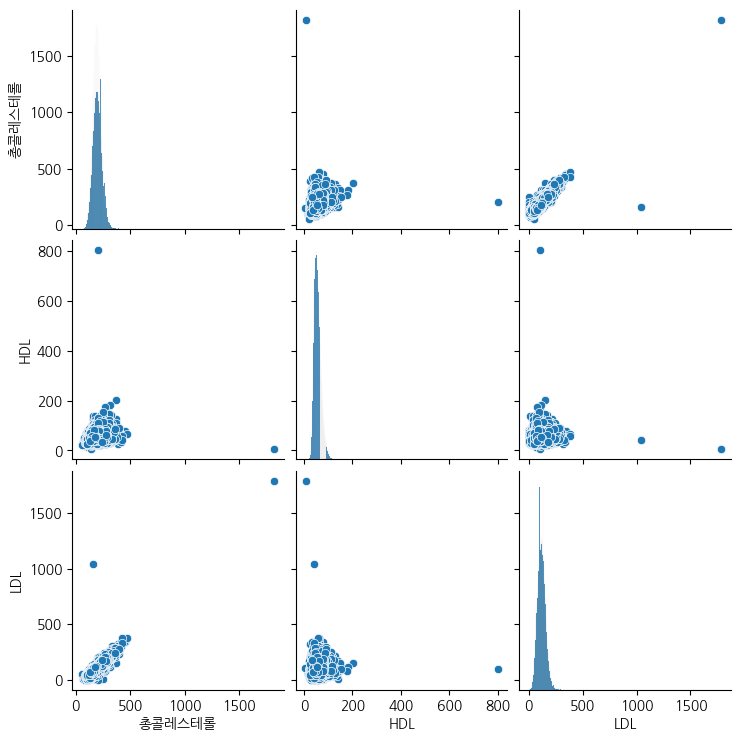

In [ ]:
# Pair Plot
# Variables with a strong correlation will have scatter plots in a linear shape.
# If there’s too much data, it may not be accurate. Adding an option to color by density would be ideal.
variables = ['흡연상태', '총콜레스테롤', 'HDL', 'LDL']
sns.pairplot(smoke_chol[variables])
plt.show()

#### The proportion of smoking status by gender

- pd.crosstab()
  - normalize
    1. normalize = 'index' : the sum of values in a row equals 1
    2. normalize = 'columns' : the sum of values in a column equals 1

In [ ]:
# smoking status by gender
smoking_status = pd.crosstab(index=smoke_chol['sex'], columns=smoke_chol['흡연상태'], normalize='index')
smoking_status

흡연상태,1.0,2.0,3.0
sex,,,
1,0.375209,0.312186,0.312605
2,0.938834,0.029922,0.031244


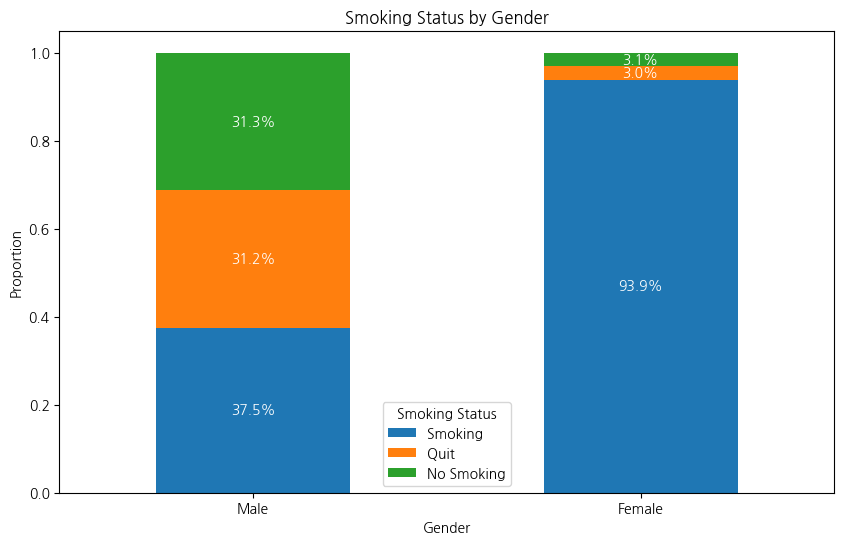

In [ ]:
# Bar Chart

smoking_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Smoking Status', labels=['Smoking', 'Quit', 'No Smoking'])

cumulative = np.zeros(len(smoking_status))
for idx, column in enumerate(smoking_status.columns):
    for i, value in enumerate(smoking_status[column]):
        cumulative[i] += value
        plt.text(
            i,
            cumulative[i] - value / 2,
            f'{value * 100:.1f}%',
            ha='center', va='center', color='white', fontsize=10
        )


plt.show()


### T-test

In [ ]:
from scipy.stats import ttest_ind

hdl_no_smoking = smoke_chol[smoke_chol['흡연상태'] == 'No smoking']['HDL']
hdl_current_smoking = smoke_chol[smoke_chol['흡연상태'] == 'Currently smoking']['HDL']

ldl_no_smoking = smoke_chol[smoke_chol['흡연상태'] == 'No smoking']['LDL']
ldl_current_smoking = smoke_chol[smoke_chol['흡연상태'] == 'Currently smoking']['LDL']

# HDL t-test
hdl_ttest = ttest_ind(hdl_no_smoking, hdl_current_smoking, equal_var=False)
print("HDL t-test statistic:", hdl_ttest.statistic)
print("HDL p-value:", hdl_ttest.pvalue)

# LDL t-test
ldl_ttest = ttest_ind(ldl_no_smoking, ldl_current_smoking, equal_var=False)
print("LDL t-test statistic:", ldl_ttest.statistic)
print("LDL p-value:", ldl_ttest.pvalue)


HDL t-test statistic: 55.555818607544495
HDL p-value: 0.0
LDL t-test statistic: 10.869431558674792
LDL p-value: 1.7839439446473833e-27


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as ols

# Set the reference value to 'Quit smoking'
smoke_chol['흡연상태'] = smoke_chol['흡연상태'].astype('category')
smoke_chol['흡연상태'] = smoke_chol['흡연상태'].cat.set_categories([2.0, 1.0, 3.0], ordered=True)

# LDL regression
ldl_model = ols.ols("LDL ~ 흡연상태", data=smoke_chol).fit()
print("LDL regression result")
print(ldl_model.summary())

# HDL regresssion
hdl_model = ols.ols("HDL ~ 흡연상태", data=smoke_chol).fit()
print("HDL regression result")
print(hdl_model.summary())


LDL regression result
                            OLS Regression Results                            
Dep. Variable:                    LDL   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     93.63
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.35e-41
Time:                        02:21:15   Log-Likelihood:            -5.3794e+05
No. Observations:              106876   AIC:                         1.076e+06
Df Residuals:                  106873   BIC:                         1.076e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.0313      

- Result: LDL regression result is not vaild since p-value of smoking status 3.0 is highr than 0.05. However, HDL regression result is valid and proves second hypothesis, showing -1.3 coefficient.